In [ ]:
import numpy as np
import pandas as pd
import skimage.data
from skimage import color,data,feature,exposure
from skimage.transform import rescale,resize
from skimage.feature import hog
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading Data

In [ ]:
Xtr=np.loadtxt("TrainData.csv")
Ytr=np.loadtxt("TrainLabels.csv")
Xts=np.loadtxt("TestData.csv")

## My picture and its extracted hog features

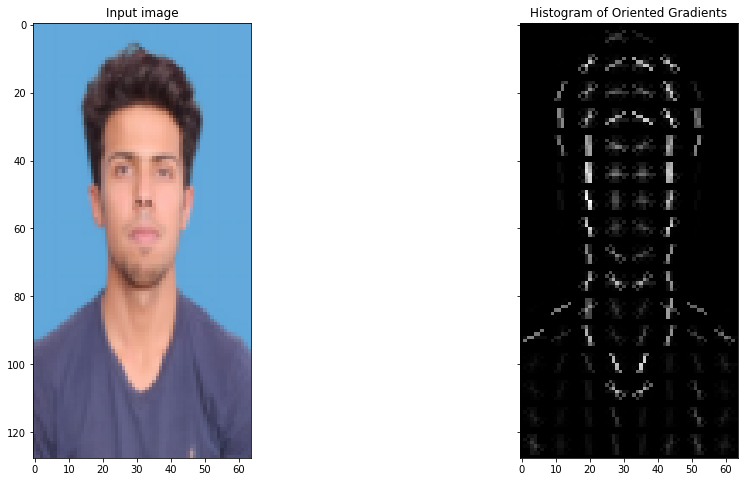

In [ ]:
myPic=mpimg.imread("myPhoto.jpeg")
resized=resize(myPic,(128,64))
fd, hog_image = hog(resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 
ax1.imshow(resized, cmap=plt.cm.gray) 
ax1.set_title('Input image') 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## Shirt image from Train data

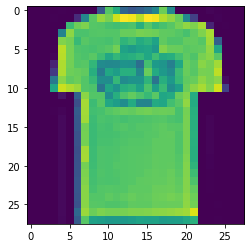

In [ ]:
plt.imshow(Xtr[1861].reshape([28,28]))

## Original shirt image and its extracted features

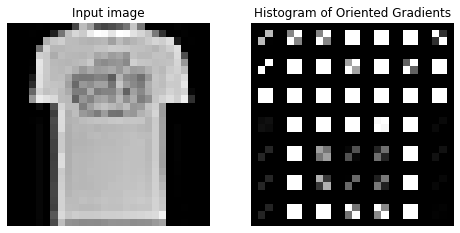

In [ ]:
image = Xtr[1861].reshape([28,28])
fd,hog_image= hog(image,orientations=8,pixels_per_cell=(4,4), 
                cells_per_block=(1,1),visualize=True,multichannel=None)
fd, (ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### List containing all images in the train data

In [ ]:
xlist=[]
for i in range(len(Xtr)):
    xlist.append(Xtr[i].reshape([28,28]))

### List containing hog features of all images 

In [ ]:
ylist=[]
for i in xlist:
    fd,hog_image= hog(i,orientations=8,pixels_per_cell=(4,4), 
                cells_per_block=(1,1),visualize=True,multichannel=None)
    ylist.append(fd)

### Splitting train data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    ylist,Ytr,train_size= 0.85,test_size=0.15, random_state=101)

### Gaussian Naive Bayes Model training and accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
YModel=model.predict(X_test)
accuracy_score(y_test,YModel)

0.7444444444444445

### Decision Trees Model training and accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train,y_train)
YModel=model.predict(X_test)
accuracy_score(y_test,YModel)

0.6983333333333334

### SVM Model training and accuracy

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X_train,y_train)
YModel=model.predict(X_test)
accuracy_score(y_test,YModel)

0.7877777777777778

### List containing all images in the test data

In [ ]:
list_test=[]
for i in range(len(Xts)):           
    list_test.append(Xts[i].reshape([28,28]))

### HOG test list

In [ ]:
hogtest_list=[]
for i in list_test:
    fd,hog_image= hog(i,orientations=8,pixels_per_cell=(4,4), 
                cells_per_block=(1,1),visualize=True,multichannel=None)
    hogtest_list.append(fd)

### Generating Test data predictions CSV file 

In [ ]:
csv=model.predict(hogtest_list)
csv=np.array(csv)
np.savetxt("Testdata_predictions.csv", csv, delimiter=",")